# Introdução a Redes Neurais
## Atividade 03
#### Desenvolver modelos para um sistema de compressão de unidade estacionárias de produção de petróleo
##### Parte 01

Import das bibliotecas:

In [1]:
from pandas import read_csv
from matplotlib import pyplot

Conjunto de dados de pressão de sucção contida no arquivo Pressão_succao.csv:

               Press
N                   
2000-01-01  0.014555
2000-01-02  0.245910
2000-01-03  0.555520
2000-01-04  0.015620
2000-01-05  0.287840


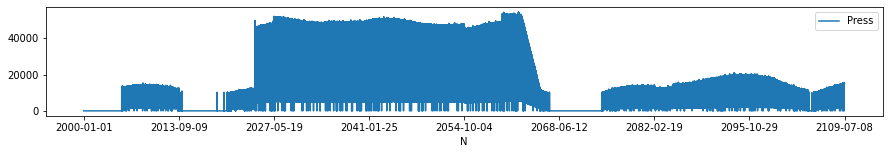

In [32]:
series = read_csv('pressao_succao_c2.csv', header=0, index_col=0)
print(series.head())
series.plot(figsize=(15,2))
pyplot.show()

In [ ]:
series.info()

Como não existem dados nulos ou ausentes, então a etapa de eliminação de valores nulos não será necessária.

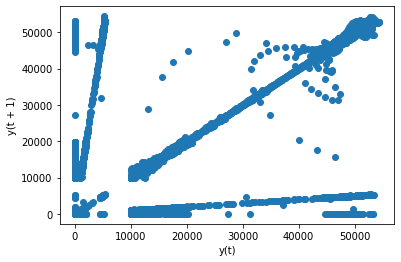

In [3]:
# Gráfico que indica a correlação entre os dados
from pandas.plotting import lag_plot
series = read_csv('pressao_succao_c2.csv', header=0, index_col=0)
lag_plot(series,lag=1)
pyplot.show()

É possível observar que para cada distúrbio do sistema, um diferente tipo de correlação pode ser utilizado para o modelo. Indica que os dados estão correlacionados entre si em cada perturbação.

In [92]:
# Coeficiente de Pearson
from pandas import DataFrame
from pandas import concat
# Indica o grau de correlação entre as variáveis
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.816452
t+1  0.816452  1.000000


Uma correlação de 0.816452 entre t-1 e t+1 foi obtida. Valor indica um bom grau de correlação entre os dados.

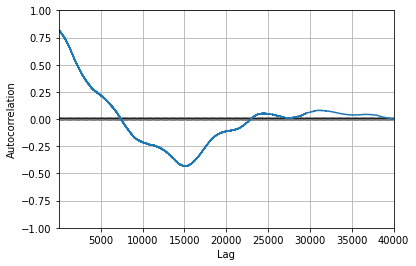

In [5]:
# Gráficos de autocorrelação
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
pyplot.show()

O gráfico indica boa parte dos dados do passado influenciam significativamente os dados no futuro. E como o esperado, este impacto diminue ao longo do tempo.

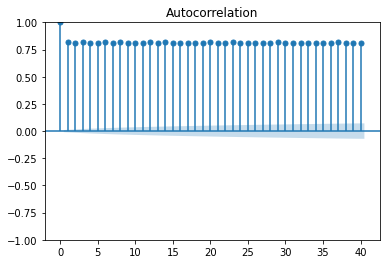

In [6]:
from statsmodels.graphics.tsaplots import plot_acf
series = read_csv('pressao_succao_c2.csv', header=0, index_col=0)
plot_acf(series, lags=40)
pyplot.show()

Este gráfico reafirma o que foi observado anteriormente, existe uma correlação significativa entre os dados.

Assim, estes dados podem ser utilizados para prever futuros estados do modelo.

### Modelo de Persistencia

In [95]:
# Separar os conjuntos de teste e treinamento
X = dataframe.values
size = int(len(X)*0.66)
train, test = X[1:size], X[size:len(X)]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
X

array([[       nan, 1.4555e-02],
       [1.4555e-02, 2.4591e-01],
       [2.4591e-01, 5.5552e-01],
       ...,
       [1.5226e+04, 1.5238e+04],
       [1.5238e+04, 1.5258e+04],
       [1.5258e+04, 1.5235e+04]])

In [108]:
# Normalização dos dados
from sklearn.preprocessing import MinMaxScaler
sc_in = MinMaxScaler(feature_range=(0, 1))
scaled_input = sc_in.fit_transform(dataframe[['t-1', 't+1']])
scaled_input = DataFrame(scaled_input)
X_sc = scaled_input
X_sc.rename(columns={0:'t-1', 1:'t+1'}, inplace=True)

train_sc, test_sc = X_sc[1:size].dropna(), X_sc[size:len(X_sc)].dropna()
train_X_sc, train_y_sc = train_sc['t-1'], train_sc['t+1']
test_X_sc, test_y_sc =  test_sc['t-1'], test_sc['t+1']

In [109]:
# Modelo de persistencia
def model_persistence(x):
    return x

In [117]:
from sklearn.metrics import mean_squared_error
from numpy import array
# walk-forward validation
predictions = list()
for x in test_X_sc:
    yhat = model_persistence(x)
    predictions.append(yhat)

In [118]:
from math import sqrt
rmse = sqrt(mean_squared_error(test_y_sc, predictions))
print('Teste RMSE: %.3f' % rmse)

Teste RMSE: 0.105


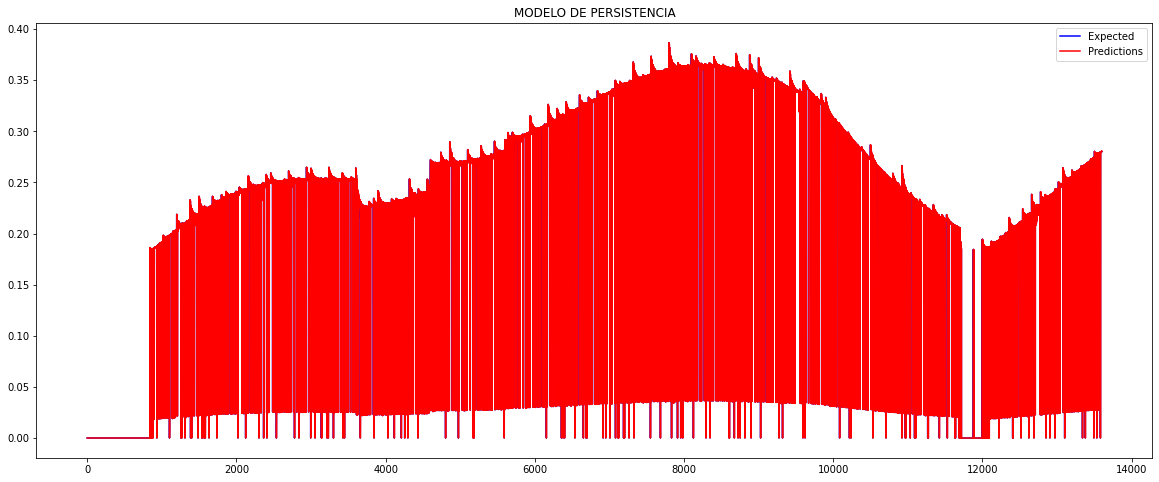

In [119]:
# Gráfico das predições vs esperado
pyplot.figure(figsize=(20,8))
pyplot.plot(array(test_y_sc), color='blue', label='Expected')
pyplot.plot(predictions, color='red', label='Predictions')
pyplot.title('MODELO DE PERSISTENCIA')
pyplot.legend()
pyplot.show()

### Modelo de Autoregressão (AR)

In [123]:
from statsmodels.tsa.ar_model import AutoReg

# Normalização dos dados
from sklearn.preprocessing import MinMaxScaler
sc_in = MinMaxScaler(feature_range=(0, 1))
scaled_input = sc_in.fit_transform(series)
scaled_input = DataFrame(scaled_input)
X_sc = scaled_input

# Separando o conjuto de dados para treinamento e testes
train_sc, test_sc = X_sc[1:size].dropna(), X_sc[size:len(X_sc)].dropna()

# Treinamento do modelo autoregressivo
model = AutoReg(array(train_sc), lags=100)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

Coefficients: [ 1.73540189e-03  3.26203292e-02  2.32549997e-03  2.81752597e-02
  1.30316937e-02  4.41687814e-03  2.42026505e-02  1.93699368e-02
  2.79423545e-02  1.65839085e-02  1.52697453e-02  1.24456924e-02
  2.29489948e-02  8.80707383e-03  2.39494620e-02  1.61075219e-02
  3.33506646e-03  1.91151426e-02  1.55919944e-02  2.09732265e-02
  2.56072630e-02  7.49898350e-04  1.18485770e-02  2.40167440e-02
  1.14368762e-02  2.14373005e-02  1.07261675e-02  1.67789912e-02
  1.16577934e-02  2.13000573e-02  1.06802749e-02  1.39019026e-02
  1.31629031e-02 -6.78507582e-04  1.11873780e-02  1.76095099e-02
  1.20933001e-02  2.54866351e-02  1.07669101e-02  5.70570527e-03
  1.20005824e-02  3.02138119e-02  6.56967604e-03  3.59521328e-03
  9.68726501e-03  2.62017864e-02  1.39347191e-02  8.13654390e-05
 -3.67253809e-03  4.15536942e-03 -5.23217686e-03  1.55773993e-03
  1.35739602e-02  2.52861191e-02 -1.79954278e-02  1.97645994e-02
  1.73394667e-05  1.65165798e-02 -1.22655813e-02  7.86371011e-03
  1.6382130

In [126]:
from math import sqrt
# Criando as predições
predictions_ar = model_fit.predict(start=len(train_sc), end=len(train_sc)+len(test_sc)-1, dynamic=False)
rmse_ar = sqrt(mean_squared_error(test_sc, predictions_ar))
print('Test RMSE: %.3f' % rmse_ar)

Test RMSE: 0.126


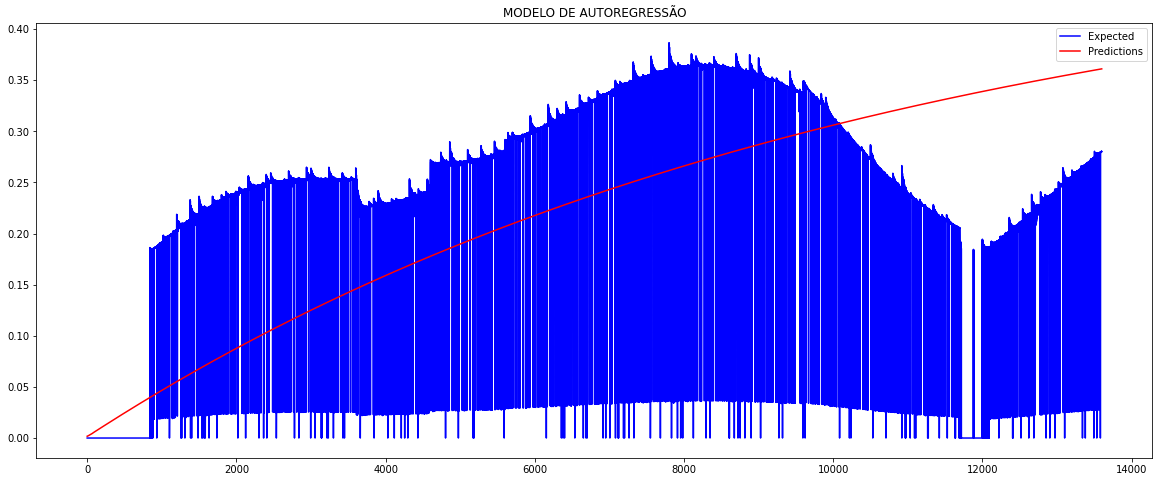

In [128]:
# Gráfico dos resultados
pyplot.figure(figsize=(20,8))
pyplot.plot(array(test_sc), color='blue', label='Expected')
pyplot.plot(predictions_ar, color='red', label='Predictions')
pyplot.legend()
pyplot.title('MODELO DE AUTOREGRESSÃO')
pyplot.show()

Visto que o RMSE para o modelo Autoregressivo foi maior do que o modelo de Persistencia, o modelo Autoregressivo será descartado.

### Modelo ARIMA

In [15]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(series, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression:", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -2.0676693820235874
2. P-Value :  0.25771199340893486
3. Num Of Lags :  54
4. Num Of Observations Used For ADF Regression: 39946
5. Critical Values :
	 1% :  -3.4305137140206043
	 5% :  -2.86161235783353
	 10% :  -2.566808513751563


Como o P-Value > 0.05, a série não é estacionária.

In [16]:
from statsmodels.tsa.arima.model import ARIMA
from pandas import DataFrame

# Fit model
model_arima = ARIMA(series, order=(5,1,0))
model_fit_arima = model_arima.fit()

# Resumo das informações do fit model
print(model_fit_arima.summary())

C:\Users\camil\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\camil\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\camil\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:                  Press   No. Observations:                40001
Model:                 ARIMA(5, 1, 0)   Log Likelihood             -421563.149
Date:                Sat, 15 Jan 2022   AIC                         843138.297
Time:                        16:56:31   BIC                         843189.877
Sample:                    01-01-2000   HQIC                        843154.624
                         - 07-08-2109                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8185      0.003   -268.580      0.000      -0.825      -0.813
ar.L2         -0.6677      0.004   -169.076      0.000      -0.675      -0.660
ar.L3         -0.4915      0.004   -116.781      0.0

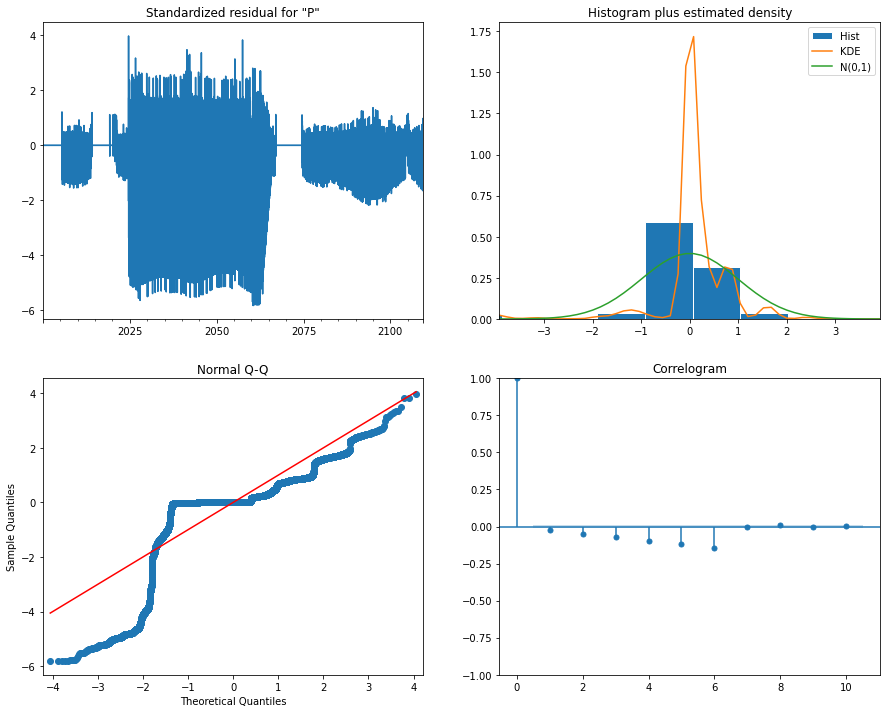

In [17]:
model_fit_arima.plot_diagnostics(figsize=(15, 12))
pyplot.show()

In [18]:
from sklearn.metrics import mean_squared_error

# Separação dos conjuntos de dados para treino e teste
X = series.values
size2 = int(len(X)*0.66)
train_arima, test_arima = X[0:size2], X[size2:len(X)]
history_arima = [x for x in train_arima]
predictions_arima1 = list()

In [19]:
# Validação walk-forward
for t in range(len(test_arima)):
    model_arima = ARIMA(history_arima, order=(5,1,0))
    model_fit_arima = model_arima.fit()
    output_arima = model_fit_arima.forecast()
    yhat_arima = output_arima[0]
    predictions_arima1.append(yhat_arima)
    obs_arima = test_arima[t]
    history_arima.append(obs_arima)
    #print('predicted=%f, expected=%f' % (yhat, obs))

In [143]:
type(predictions_arima1)

list

In [145]:
# Normalização dos dados
sc_test = MinMaxScaler(feature_range=(0, 1))
scaled_test = sc_test.fit_transform(test_arima)
#scaled_test = DataFrame(scaled_test)
sc_pred = MinMaxScaler(feature_range=(0, 1))
scaled_pred = sc_pred.fit_transform(DataFrame(predictions_arima1))


In [146]:
# Avaliação das predições - Arima1
from math import sqrt
rmse_arima1 = sqrt(mean_squared_error(scaled_test, scaled_pred))
print('Teste RMSE1: %.3f' % rmse_arima1)

Teste RMSE1: 0.211


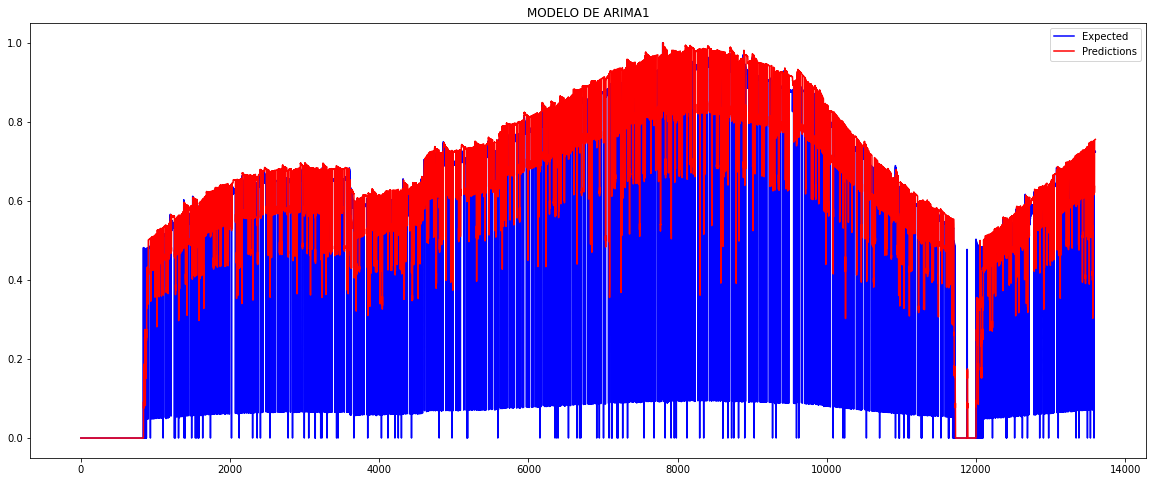

In [148]:
# Gráfico dos resultados - Arima1
pyplot.figure(figsize=(20,8))
pyplot.plot(scaled_test, color='blue', label='Expected')
pyplot.plot(scaled_pred, color='red', label='Predictions')
pyplot.title('MODELO DE ARIMA1')
pyplot.legend()
pyplot.show()

### Modelo ARIMA2

In [149]:
# Determinação da melhor configuração para o modelo Arima2
from pmdarima import auto_arima 
stepwise_fit_arima1 = auto_arima (scaled_input, start_p=1, start_d=1, start_q=1, trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-34612.961, Time=43.87 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-8128.605, Time=4.45 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-18949.476, Time=3.48 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-34612.748, Time=23.39 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-8130.605, Time=2.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-34624.772, Time=44.30 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-23966.727, Time=4.42 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-34623.901, Time=96.40 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-34609.236, Time=65.55 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-34609.895, Time=56.89 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-26437.810, Time=5.51 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-34622.090, Time=75.45 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-34626.745, Time=11.32 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-34614.918, Time=11.62 se

In [150]:
# Fit model - Arima 2
model_arima2 = ARIMA(scaled_input, order=(2,1,1))
model_fit_arima2 = model_arima2.fit()

# Resumo das informações do fit model
print(model_fit_arima2.summary())

                               SARIMAX Results                                
Dep. Variable:                      0   No. Observations:                40001
Model:                 ARIMA(2, 1, 1)   Log Likelihood               17317.373
Date:                Mon, 17 Jan 2022   AIC                         -34626.745
Time:                        16:29:38   BIC                         -34592.358
Sample:                             0   HQIC                        -34615.861
                              - 40001                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0070      0.003      2.110      0.035       0.000       0.013
ar.L2         -0.0190      0.004     -5.153      0.000      -0.026      -0.012
ma.L1         -0.9759      0.001  -1180.327      0.0

In [151]:
# Determinar as predições do modelo Arima2
start_arima2 = len(train_arima)
end_arima2 = len(train_arima)+len(test_arima)-1
predictions_arima2 = model_fit_arima2.predict(start=start_arima2,end=end_arima2,typ='levels').rename('ARIMA2 Predictions')

In [152]:
# Avaliação das predições - Arima2
rmse_arima2 = sqrt(mean_squared_error(scaled_test, predictions_arima2))
print('Teste RMSE2: %.3f' % rmse_arima2)
predictions_arima22 = predictions_arima2.to_numpy()

Teste RMSE2: 0.433


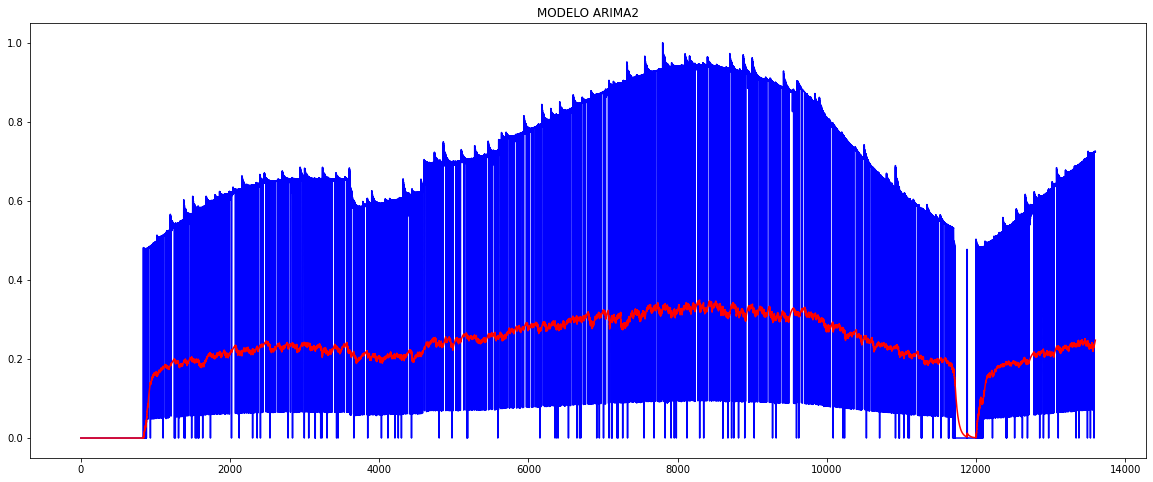

In [153]:
# Gráfico dos resultados - Arima2
pyplot.figure(figsize=(20,8))
pyplot.plot(scaled_test, color='blue', label='Expected')
pyplot.plot(predictions_arima22, color='red', label='Predictions')
pyplot.title('MODELO ARIMA2')
pyplot.show()